# Plotting (Visualisation) 

## Learning Objectives 
- Understand the basic capabilities of plotting libraries in Julia 
- Install and use the Plots.jl package for creating visualisations 
- Create and customise a single common plot type: line plots, scatter plots, bar plots, etc. 
- Save plots to files in various formats (e.g., PNG)

Visualizing data is an important part of analysis. Julia offers multiple plotting packages. One of the most popular high-level packages is **Plots.jl**, which provides a unified API and supports multiple backends (GR, PyPlot/Matplotlib, Plotly, etc.). Here, we will use Plots.jl with its default backend (usually GR, which produces static plots quickly).
Another plotting library is **Gadfly.jl** (inspired by ggplot2 in R). And for advanced usage, **Makie.jl** is a powerful library for interactive and publication-quality plots. But Plots.jl is a great starting point due to its simplicity and flexibility.

## Overview of Plotting Capabilities in Julia

Julia’s plotting ecosystem can handle simple tasks like plotting a line or scatter, as well as complex tasks like 3D surfaces or interactive animations. Plots.jl aims to be a convenient, common interface.
When using Plots.jl, you typically:
- Ensure Plots is installed: `Pkg.add("Plots")` (already covered in Package Management).
- Do `using Plots`.
- Call a plotting function like `plot` (for line plots or general plots), `scatter`, `bar`, etc., possibly providing data and options.
- Customize the plot by adding attributes (title, labels, legend, colors, markers, etc.).
- Display it (in Jupyter, just ensure the plot command is the last in the cell or use `display`).
- Save it using `savefig("filename.png")` if needed.

Plots.jl by default in a script might open a separate window to show the graph (using GR or other backend). In Jupyter, it displays inline.

## Basic Plotting with Plots.jl 
We should have Plots installed (if not, do `Pkg.add("Plots")`), then 'using Plots'. The first time you do this, it can take a moment. 

### Line plots 
A line plot is typically used to show a series of data points connected by lines, often to visualise a function or a trend over an index or time. For example if we wanted to plot `y = x ^ 2` for `x` from 0 to 100, we could do: 

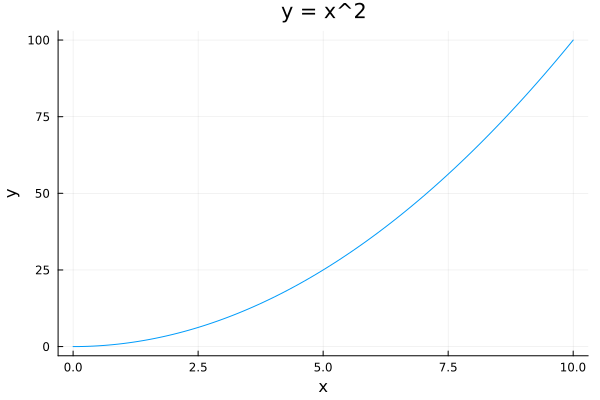

In [1]:
using Plots
x = 0:0.1:10                  # range from 0 to 10 with step 0.1
y = x .^ 2                    # y is x squared (elementwise)
plot(x, y,                   # data
     title="y = x^2", 
     xlabel="x", ylabel="y", 
     legend=false)           # legend not needed for a single series

This will produce a curve (parabola) from 0 to 100. We passed vectors `x` and `y` to `plot` along with some keyword arguments to set title and axis labels, and we turned off the legend because there’s only one series and we labeled it in the title.

## Customizing Titles, Labels, Legends
As seen, you can use `title="..."`, `xlabel="..."`, `ylabel="..."` in the plotting call. To control legend:
- `label="name"` sets the series name in legend.
- `legend=true/false` to show or hide legend.
- `legend=:topright` or `:bottomleft`, etc., to position it. (By default Plots picks a corner or outside.)
- `legendtitle="..."` if you want a heading on the legend.

For axes limits:
- `xlim=(xmin, xmax)`, `ylim=(ymin, ymax)` to manually set the range (otherwise it auto-scales to data).
- `xticks` or `yticks` to specify tick positions or labels (you can give an array of positions or a pair of positions and labels arrays).

For overall style:
- **Themes**: Plots has some built-in themes (e.g., `theme=:dark` or `:ggplot2`). You can set with `plot(...; theme=:dark)` or use `Plots.default(theme=:dark)` to set a default for future plots.
- **Font sizes**: `xlabel!("X", font=font(12))` if you need to adjust after creating the plot, or set `guidefont=font(14)` etc. in the initial call.
- **Colours**: Many named colours (`:red, blue, green, gold, salmon`, …), or supply a hex string like `color="#FF00FF"`.


## Saving Plots 
Once you have a plot displayed, you can save it using `savefig("filename.ext")`. The file extension determines the format (common ones: `.png`, `.svg`, `.pdf`, `.jpg`). PNG is a good default for raster images and SVG/PDF for vectors (scalable without loss). 

```Julia 
p = plot(x, sin.(x), title="Sine Wave", xlabel="x", ylabel="sin(x)")
savefig(p, "sine_wave.png")
```

if you don't provide the plot object `p` to savefig, it will save the current plot displayed (in scripts, the last plot made). 

## Exercise: Exploring Plot Types in Plots.jl

The `Plots.jl` package offers a wide variety of plot types to visualize different kinds of data. 

- Choose **one type of plot** that you would like to explore. Some examples include:
   - Bar charts
   - Scatter plots
   - Line plots
   - Heatmaps
   - 3D plots
   - Subplots and layouts
   - Animations
- Visit the [Plots.jl documentation](https://docs.juliaplots.org/latest/) to find examples and guidance for creating your chosen plot type.
- Create a simple example using real or made-up data. Try to choose a plot that would be useful for the kind of data you expect to work with outside this course.
- Display the plot output and try to save it to a relevant file type.

# End of Section Quiz

In [4]:
using JSON

function show_quiz_from_json(path)
    quiz_data = JSON.parsefile(path)

    html = """
    <style>
    .quiz-question {
        background-color: #6c63ff;
        color: white;
        padding: 12px;
        border-radius: 10px;
        font-weight: bold;
        font-size: 1.2em;
        margin-bottom: 10px;
    }

    .quiz-form {
        margin-bottom: 20px;
    }

    .quiz-answer {
        display: block;
        background-color: #f2f2f2;
        border: none;
        border-radius: 10px;
        padding: 10px;
        margin: 5px 0;
        font-size: 1em;
        cursor: pointer;
        text-align: left;
        transition: background-color 0.3s;
        width: 100%;
    }

    .quiz-answer:hover {
        background-color: #e0e0e0;
    }

    .correct {
        background-color: #4CAF50 !important;
        color: white !important;
        border: none;
    }

    .incorrect {
        background-color: #D32F2F !important;
        color: white !important;
        border: none;
    }

    .feedback {
        margin-top: 10px;
        font-weight: bold;
        font-size: 1em;
    }
    </style>

    <script>
    function handleAnswer(qid, aid, feedback, isCorrect) {
        // Reset all buttons for the question
        let buttons = document.querySelectorAll(".answer-" + qid);
        buttons.forEach(btn => {
            btn.classList.remove('correct', 'incorrect');
        });

        // Apply correct/incorrect to selected
        let selected = document.getElementById(aid);
        selected.classList.add(isCorrect ? 'correct' : 'incorrect');

        // Show feedback below the question
        let feedbackBox = document.getElementById('feedback_' + qid);
        feedbackBox.innerHTML = feedback;
        feedbackBox.style.color = isCorrect ? 'green' : 'red';
    }
    </script>
    """

    for (i, question) in enumerate(quiz_data)
        qid = "$i"
        html *= """<div class="quiz-question">$(question["question"])</div><form class="quiz-form">"""

        for (j, answer) in enumerate(question["answers"])
            aid = "q$(i)_a$(j)"
            feedback = answer["feedback"]
            correct = startswith(lowercase(feedback), "correct")
            html *= """
            <button type="button" class="quiz-answer answer-$qid" id="$aid"
                onclick="handleAnswer('$qid', '$aid', '$feedback', $(correct))">
                $(answer["answer"])
            </button>
            """
        end

        html *= """<div class="feedback" id="feedback_$qid"></div></form><hr>"""
    end

    display("text/html", html)
end


# Use the function
show_quiz_from_json("questions/summary_plotting.json")

Which syntax correctly generates a simple line plot of x versus y in Julia using the Plots package? 
 plot(x, y)
 
 
 draw(x, y)
 
 
 figure(x, y)
 
 
 makeplot(x, y)